Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=10JkPB2hhDmkVUoCGFP6gpoRL1mvx0OPf)



In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

<h2>Soal 1: Visualisasi Scatter Plot Perbandingan Kuantitatif</h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' yang dimana tidak bisa di ubah ke bentuk float, maka replace lah terlebih dahulu data yang bernilai '-' dengan nilai NaN, gunakan method .replace(). baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

Buahlah visualisasi perbandingan kuantitatif scatter plot, sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


Berikan pendapat dari insight yang bisa di dapat dari visualisasi perbandingan kuantitatif ini!!!

![alt text](https://drive.google.com/uc?id=1Pp5oIc-39mcw2vrw6xgCRM9GsvyRtPI5)

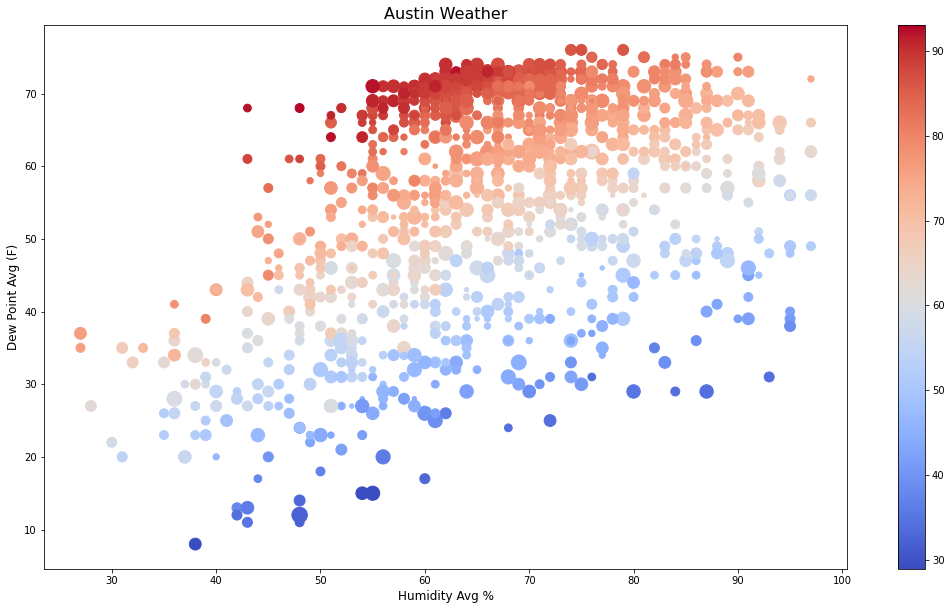

In [197]:
# code here

#Merubah nilai '-' menjadi NaN (Not a Number)
df1=df.replace('-',np.NaN)
df1.head()

#Mengisi nilai NaN dengan method ffill
df1.fillna(method='ffill')

#Merubah value dari 'object' menjadi 'float'
df1.iloc[0:, 1:-2] = df1.iloc[0:,1:-2].astype('float')
#df1.info()
#df1.head()

#Plotting
a1=df1['HumidityAvgPercent']
a2=df1['DewPointAvgF']
a3=df1['TempAvgF']
a4=df1['WindAvgMPH']

fig, ax = plt.subplots(figsize=(18,10))

aw = ax.scatter(a1, a2, c=a3, cmap='coolwarm', s=a4*20)
plt.xlabel('Humidity Avg %',size=12)
plt.ylabel('Dew Point Avg (F)', size=12)
plt.title('Austin Weather', size=16)

plt.colorbar(aw)
plt.show()

#### Insight dari Visualisasi diatas :

Scatter plot dapat membantu kita untuk membuat visualisasi perbandingan dari beberapa variabel. Pada kasus di atas, kita melihat kondisi cuaca pada kota austin menggunakan 4 variabel yaitu Kelembapan udara (Humidity Avg %), Titik Embun (DewPointAvgF),Kecepatan Angin (WindAvgMPH), dan Temperatur rata-rata (TempAvgF).

Hasil Scatter Plot menunjukkan, terdapat konsentrasi data bersuhu tinggi pada rentang kelembapan udara 50-70%, dan titik embun sekitar 70 derajat Fahrenheit. Sedangkan data bersuhu rendah terlihat cukup tersebar luas pada tingkat kelembapan 30-100%, tetapi mayoritas terdapat pada titik embun 0-50 derajat Fahrenheit. 

---

---

Downoad  <a href="https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv">vgsales.csv</a>

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

df_vgs = pd.read_csv('vgsales.csv')
df_vgs.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<h2>Soal 2: Preparing Data</h2>

Manipulasi data tersebut dengan menggroupkan berdasarkan Genre, kemudian ambil rata2 penjualan untuk setiap Region Kecuali Global_Sales berdasarkan kategori Genre.

In [119]:
#code here
df_vgs=df_vgs.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].mean()
df_vgs

<ipython-input-119-e7f8aca2dde8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_vgs=df_vgs.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].mean()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264726,0.158323,0.048236,0.056508
Adventure,0.082271,0.049868,0.040490,0.013072
Fighting,0.263667,0.119481,0.103007,0.043255
Misc,0.235906,0.124198,0.061967,0.043312
Platform,0.504571,0.227573,0.147596,0.058228
Puzzle,0.212680,0.087251,0.098471,0.021564
Racing,0.287766,0.190865,0.045388,0.061865
Role-Playing,0.219946,0.126384,0.236767,0.040060
Shooter,0.444733,0.239137,0.029221,0.078389


Expected Output:

![alt text](https://drive.google.com/uc?id=1dR4vthSt22gM_LdfSBZCMIKPL6xd7nVl)

---

<h2>Soal 3: Perbandingan Kuantitatif Barplot - Grouping Visualisasi Dengan Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menghasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

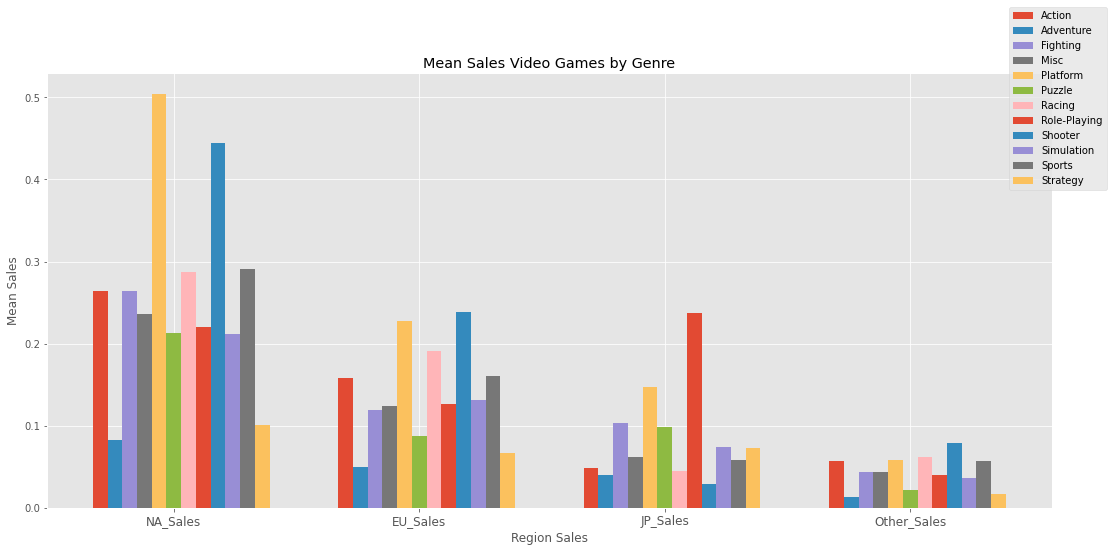

In [198]:
#code here
dfT=df_vgs.T
dfT

width=0.06

with plt.style.context('ggplot'):
    fig,ax= plt.subplots(figsize=(18,8))
    for i,j in enumerate(dfT.columns):
        ax.bar(x+(i*width), dfT[j],width=width, label=j)

    ax.set_title('Mean Sales Video Games by Genre')
    ax.set_ylabel('Mean Sales')
    ax.set_xlabel('Region Sales')
    ax.legend(loc='upper right',frameon=True,bbox_to_anchor=(1.06,1.164))
    plt.xticks(x+0.3, labels=df_vgs.columns, size=12)
    plt.show()


Insight :
Pada region North America dan Europe, penjualan yang cukup menonjol dihasilkan oleh games dengan genre 'platform' & 'shooter'. Sedangkan pada region Jepang, game dengan genre 'Role Playing' cukup mendominasi dibanding genre lainnya. Jika dibandingkan dengan region lainnya (Other Sales), game dengan genre 'shooter' menjadi favorit dari pengguna. Dapat pula disimpulkan game dengan genre 'Adventure' menjadi genre yang kurang diminati.

Jawab:

Expected Output:

![alt text](https://drive.google.com/uc?id=1A2s9Uy2i471VEYIZqMoVUIlZnVOUc8ha)

---

<h2>Soal 4: Perbandingan Kuantitatif Barplot - Stack Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menhasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

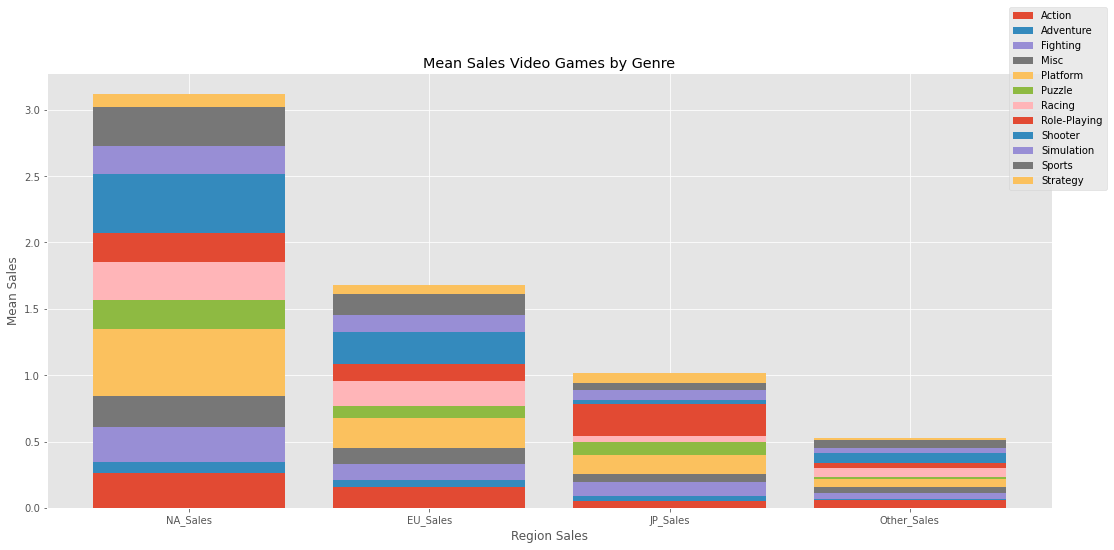

In [199]:
#code here
width = 0.06
y_bottom = 0
with plt.style.context('ggplot'):
    fig,ax=plt.subplots(figsize=(18,8))
    for i,j in enumerate(dfT.columns):
        ax.bar(x, dfT[j], label=j, bottom=y_bottom)
        y_bottom += dfT[j]

    ax.set_title('Mean Sales Video Games by Genre')
    ax.set_ylabel('Mean Sales')
    ax.set_xlabel('Region Sales')
    ax.legend(loc='upper right',frameon=True,bbox_to_anchor=(1.06,1.164))
    plt.xticks(x, labels=df_vgs.columns)
    plt.show()

Insight:
Sama seperti insight sebelumnya, dengan tambahan bahwa dengan menggunakan stack bar plot,terlihat bahwa region North america, Europe, dan Jepang menjadi kontributor yang lebih dominan dibanding region lainnya(Other Sales).Kemudian dapat dilihat juga bahwa total rata-rata penjualan region North America menjadi yang paling besar, sekitar tiga kali lipat dari region jepang.

Jawab:

Expected Output:

![alt text](https://drive.google.com/uc?id=1_yis-3aZsEbsk68tpoPHoNlFftaz2GrO)